# Data Cleaning Challenge.

In [1]:
#importing libraries for data manipulations/processing

import numpy as np
import pandas as pd

In [2]:
#importing libraries for visualizations

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#importing the dataset
fifa = pd.read_csv('fifa21 raw data v2.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_11108\1313449408.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('fifa21 raw data v2.csv')


In [4]:
#just a peek of how the dataset looks like.
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [6]:
#checking for null values
print(fifa.isnull().sum().to_string())

ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
Nationality             0
Age                     0
↓OVA                    0
POT                     0
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  0
Preferred Foot          0
BOV                     0
Best Position           0
Joined                  0
Loan Date End       17966
Value                   0
Wage                    0
Release Clause          0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                 0
Skill                   0
Dribbling               0
Curve                   0
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                 0
Reactions   

<AxesSubplot:>

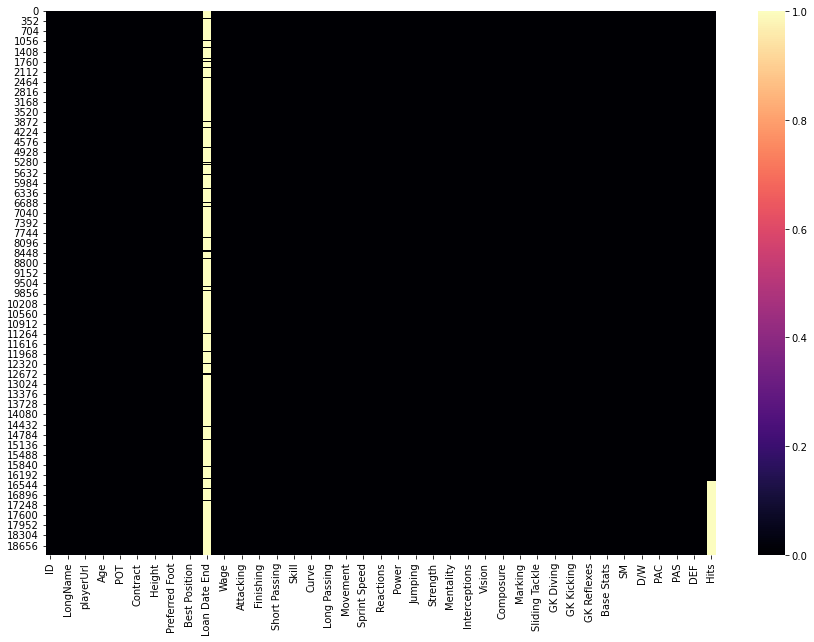

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(fifa.isnull(), cmap='magma')

In [8]:
#checking for duplicated records
fifa.duplicated().sum()

0

From these we can notice that the Hits and Loan Date end columns have a number of missing values.
And there are no duplicated records.

We have to try to find out why there are missing values in those columns before we could do anything on them.

In [9]:
fifa['Hits']

0        771
1        562
2        150
3        207
4        595
        ... 
18974    NaN
18975    NaN
18976    NaN
18977    NaN
18978    NaN
Name: Hits, Length: 18979, dtype: object

In [10]:
#Number of players with the hits column as 0
0 in fifa['Hits'].unique()

False

From the above, we can deduce that they may be values were intentionally left missing because no one has visited the players url, i.e it missing values are 0.
or, it may be due to lost of some data or any other problem.
We may drop the Hits columns, or rather we fill in the missing values with zeros, this way we still keep the infos the column can still provide for us instead of dropping it.  

In [11]:
fifa['Hits'].fillna(0, inplace= True)

In [12]:
fifa['Hits'].isnull().sum()

0

With that done with, let's checkout the LoanDate end column next

In [13]:
fifa['Loan Date End'][fifa['Loan Date End'].notnull()]

205      Jun 30, 2021
248      Jun 30, 2021
254      Jun 30, 2021
302      Jun 30, 2021
306      Jun 30, 2021
             ...     
18472    Aug 31, 2021
18571    Jun 30, 2021
18600    Dec 31, 2020
18622    Dec 31, 2020
18680    Dec 31, 2020
Name: Loan Date End, Length: 1013, dtype: object

In [14]:
fifa['Loan Date End'].value_counts()

Jun 30, 2021    770
Dec 31, 2020    100
May 31, 2021     30
Dec 31, 2021     22
Jan 31, 2021     18
Jan 1, 2021      15
Jun 30, 2022     15
Nov 30, 2020      7
Jun 23, 2021      7
Nov 27, 2021      6
Nov 22, 2020      5
Jan 3, 2021       3
Aug 31, 2021      2
May 31, 2022      2
Jan 4, 2021       2
Jul 1, 2021       1
Dec 30, 2021      1
Jul 5, 2021       1
Jan 17, 2021      1
Jun 30, 2023      1
Jul 31, 2021      1
Dec 30, 2020      1
Jan 30, 2021      1
Aug 1, 2021       1
Name: Loan Date End, dtype: int64

According to the table all the players(aside those with missing values) are on loan deals, which is kinda fishy. 
We can assume that the missing values may not be on loan deals, that's why they were left as missing values(we can confirm this by checking some of the players' contract deals on the internet).
 
So, we can fill in the missing values with 'Not Loan'.

In [15]:
fifa['Loan Date End'].fillna('Not loan', inplace= True)

Let's checkout other columns...

In [16]:
fifa['Name']

0                 L. Messi
1        Cristiano Ronaldo
2                 J. Oblak
3             K. De Bruyne
4                Neymar Jr
               ...        
18974               Xia Ao
18975             B. Hough
18976          R. McKinley
18977         Wang Zhen'ao
18978            Zhou Xiao
Name: Name, Length: 18979, dtype: object

In [17]:
fifa['LongName']

0                        Lionel Messi
1        C. Ronaldo dos Santos Aveiro
2                           Jan Oblak
3                     Kevin De Bruyne
4          Neymar da Silva Santos Jr.
                     ...             
18974                          Ao Xia
18975                       Ben Hough
18976                  Ronan McKinley
18977                    Zhen'ao Wang
18978                       Xiao Zhou
Name: LongName, Length: 18979, dtype: object

We'll be dropping the Name column because it's almost same as the LongName column, except that the LongName column contains more info. than it does.
So its logical that we keep the LongName column and drop the Name column instead.

In [18]:
fifa.drop('Name', axis=1, inplace=True)

In [19]:
fifa.photoUrl

0        https://cdn.sofifa.com/players/158/023/21_60.png
1        https://cdn.sofifa.com/players/020/801/21_60.png
2        https://cdn.sofifa.com/players/200/389/21_60.png
3        https://cdn.sofifa.com/players/192/985/21_60.png
4        https://cdn.sofifa.com/players/190/871/21_60.png
                               ...                       
18974    https://cdn.sofifa.com/players/247/223/21_60.png
18975    https://cdn.sofifa.com/players/258/760/21_60.png
18976    https://cdn.sofifa.com/players/252/757/21_60.png
18977    https://cdn.sofifa.com/players/243/790/21_60.png
18978    https://cdn.sofifa.com/players/252/520/21_60.png
Name: photoUrl, Length: 18979, dtype: object

Just btw, there's a total of 164 different countries in the dataset. Majority of the players are from England, Germany, Spain, France, Argentina or Brazil.

In [20]:
#total number of countries
fifa['Nationality'].nunique()

164

In [21]:
fifa['Nationality'].value_counts().head(10)

England        1705
Germany        1195
Spain          1065
France         1003
Argentina       943
Brazil          887
Japan           485
Netherlands     438
Italy           387
Sweden          380
Name: Nationality, dtype: int64

<AxesSubplot:ylabel='Nationality'>

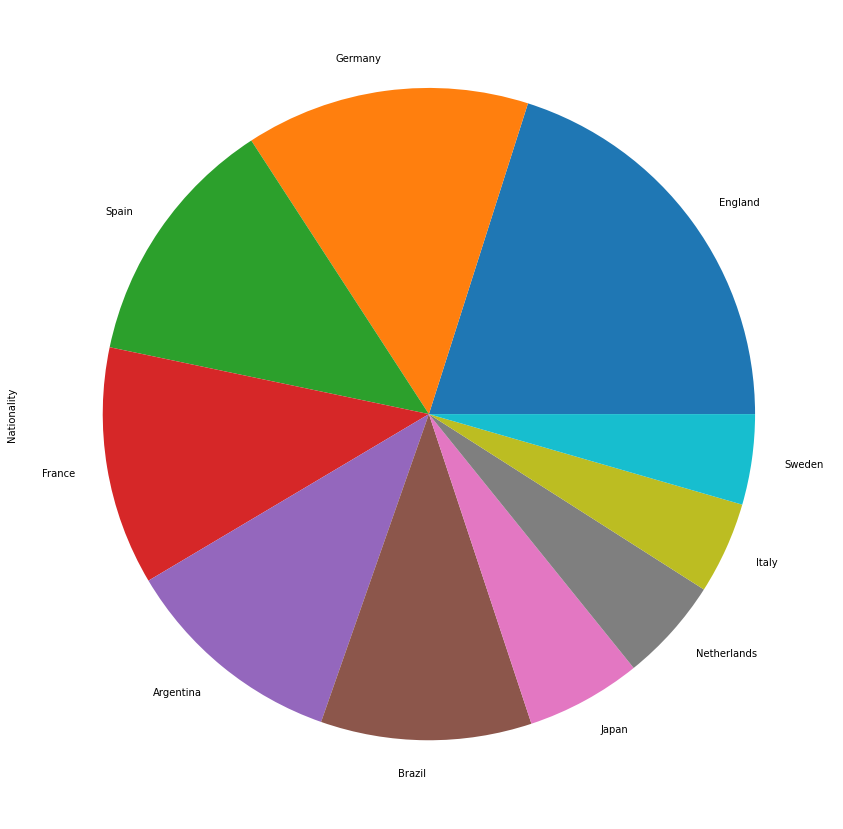

In [22]:
plt.figure(figsize=(18,15))
fifa['Nationality'].value_counts().head(10).plot.pie()

In [23]:
#checking the columns of the dataset again
fifa.columns

Index(['ID', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age', '↓OVA',
       'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', '

In [24]:
#number of players greater than 40
(fifa['Age'] > 40).sum()

14

In [25]:
#players greater than 40
fifa[fifa['Age']> 40]

,ID,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
262,1179,Gianluigi Buffon,https://cdn.sofifa.com/players/001/179/21_60.png,http://sofifa.com/player/1179/gianluigi-buffon...,Italy,42,82,82,\n\n\n\nJuventus,2019 ~ 2021,...,Medium,Medium,4 ★,77,76,74,78,33,91,131
1083,153260,Vitorino Hilton da Silva,https://cdn.sofifa.com/players/153/260/21_60.png,http://sofifa.com/player/153260/vitorino-hilto...,Brazil,42,77,77,\n\n\n\nMontpellier HSC,2011 ~ 2021,...,Medium,Medium,2 ★,33,51,67,65,81,70,46
3964,156483,Cristian Lucchetti,https://cdn.sofifa.com/players/156/483/21_60.png,http://sofifa.com/player/156483/cristian-lucch...,Argentina,42,71,71,\n\n\n\nAtlético Tucumán,2012 ~ 2021,...,Medium,Medium,1 ★,72,69,76,70,43,69,9
5792,136553,Dong Gook Lee,https://cdn.sofifa.com/players/136/553/21_60.png,http://sofifa.com/player/136553/dong-gook-lee/...,Korea Republic,41,69,69,\n\n\n\nJeonbuk Hyundai Motors,2009 ~ 2020,...,High,Low,3 ★,32,77,62,58,29,62,15
7736,105308,Jean-François Gillet,https://cdn.sofifa.com/players/105/308/21_60.png,http://sofifa.com/player/105308/jean-francois-...,Belgium,41,67,67,\n\n\n\nStandard de Liège,2016 ~ 2021,...,Medium,Medium,2 ★,64,70,69,64,39,74,8
7917,162952,Mauricio Caranta,https://cdn.sofifa.com/players/162/952/21_60.png,http://sofifa.com/player/162952/mauricio-caran...,Argentina,41,67,67,\n\n\n\nClub Atlético Talleres,2016 ~ 2020,...,Medium,Medium,1 ★,65,67,67,63,48,65,6
10101,29552,Shunsuke Nakamura,https://cdn.sofifa.com/players/029/552/21_60.png,http://sofifa.com/player/29552/shunsuke-nakamu...,Japan,42,65,65,\n\n\n\nYokohama FC,2019 ~ 2021,...,High,Low,3 ★,30,69,74,67,36,51,47
10834,208927,Hussain Sulaimani,https://cdn.sofifa.com/players/208/927/21_60.png,http://sofifa.com/player/208927/hussain-sulaim...,Saudi Arabia,43,64,64,\n\n\n\nAl Ahli,2019 ~ 2024,...,High,Medium,1 ★,43,53,68,64,64,72,25
11426,169108,Leao Butrón,https://cdn.sofifa.com/players/169/108/21_60.png,http://sofifa.com/player/169108/leao-butron/21...,Peru,43,64,64,\n\n\n\nAlianza Lima,2015 ~ 2020,...,Medium,Medium,1 ★,63,60,61,63,23,67,11
14779,254196,Luis Fernando Fernández,https://cdn.sofifa.com/players/254/196/21_60.png,http://sofifa.com/player/254196/luis-fernando-...,Colombia,42,61,61,\n\n\n\nSD Aucas,2018 ~ 2024,...,Medium,Medium,1 ★,60,62,61,63,32,55,2


In [26]:
#There's one player that is over the age of 50

fifa[fifa['Age']>50]

,ID,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16109,254704,Kazuyoshi Miura,https://cdn.sofifa.com/players/254/704/21_60.png,http://sofifa.com/player/254704/kazuyoshi-miur...,Japan,53,59,59,\n\n\n\nYokohama FC,2005 ~ 2021,...,Low,Low,1 ★,25,63,55,60,19,47,125


In [27]:
#just checking if the IDs are truly unique, haha.
fifa['ID'].nunique()

18979

In [28]:
#renaming the ↓OVA column so it can be easier when we wanna call it

fifa.rename(columns={'↓OVA':'OVA'}, inplace= True )

In [29]:
#checking if there's any data recorded wrongly, i.e have the value greater than 100 or lesser than 0
(fifa['OVA']>100).sum()

0

In [30]:
fifa['OVA'].nunique()

47

In [31]:
#most players have overall ratings between 60-70
fifa['OVA'].value_counts()

65    1179
66    1157
64    1152
67    1112
63    1086
68     979
62     953
69     941
70     884
61     821
72     747
60     745
71     715
59     615
73     572
58     543
75     537
57     470
74     469
56     380
55     320
76     318
77     279
54     247
53     235
78     212
52     209
79     181
51     177
80     137
50     122
81      95
83      72
49      61
82      60
84      43
48      41
85      37
87      20
47      14
86      14
88      10
89       6
90       6
91       4
92       1
93       1
Name: OVA, dtype: int64

In [32]:
(fifa['POT']>100).sum()

0

In [33]:
fifa['Club']

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [34]:
fifa['Club']= fifa['Club'].str.strip('\n')

In [35]:
fifa['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [36]:
#total number of clubs
fifa['Club'].nunique()

682

In [37]:
#quick reminder of the columns
fifa.columns

Index(['ID', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age', 'OVA',
       'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'H

In [38]:
fifa.Contract

0        2004 ~ 2021
1        2018 ~ 2022
2        2014 ~ 2023
3        2015 ~ 2023
4        2017 ~ 2022
            ...     
18974    2018 ~ 2022
18975    2020 ~ 2021
18976    2019 ~ 2020
18977    2020 ~ 2022
18978    2019 ~ 2023
Name: Contract, Length: 18979, dtype: object

In [39]:
fifa['Height']

0        170cm
1        187cm
2        188cm
3        181cm
4        175cm
         ...  
18974    178cm
18975    175cm
18976    179cm
18977    175cm
18978    188cm
Name: Height, Length: 18979, dtype: object

In [40]:
fifa['Height'].value_counts()

180cm    1474
178cm    1250
185cm    1182
183cm    1148
175cm    1091
         ... 
6'5"        1
157cm       1
5'4"        1
5'6"        1
155cm       1
Name: Height, Length: 62, dtype: int64

Some heights are in centimeter, while some are in inches and feet. We have to convert them to the same units.

In [41]:
fifa['Height'].astype('str')

0        170cm
1        187cm
2        188cm
3        181cm
4        175cm
         ...  
18974    178cm
18975    175cm
18976    179cm
18977    175cm
18978    188cm
Name: Height, Length: 18979, dtype: object

In [42]:
#number of heights that are in cm
(fifa['Height'].str.endswith('cm')).sum()

18939

In [43]:
##function to change all heights to centimeters and remove the cm unit from the numbers.

def to_cm(x):
    if 'cm' in x['Height']:
        return int(x['Height'].strip('cm'))
    else:
        feet, inches = x['Height'].split("'")
        return int(inches.strip('"'))*2.54 + int(feet)*30.48

In [44]:
fifa['Height']=fifa.apply(to_cm,axis= 1)

In [45]:
#the tallest player

fifa[fifa['Height'].max()== fifa['Height']]

,ID,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
10333,199321,Tomáš Holý,https://cdn.sofifa.com/players/199/321/21_60.png,http://sofifa.com/player/199321/tomas-holy/210...,Czech Republic,28,65,67,Ipswich Town,2019 ~ 2022,...,Medium,Medium,1 ★,68,60,56,69,28,65,16


In [46]:
fifa['Weight']

0        72kg
1        83kg
2        87kg
3        70kg
4        68kg
         ... 
18974    66kg
18975    65kg
18976    74kg
18977    69kg
18978    75kg
Name: Weight, Length: 18979, dtype: object

In [47]:
fifa['Weight'].str.endswith('lbs').sum()

40

Some weight are recorded in lbs and some are in kg Converting them to same units.

In [48]:
##function that changes the weights to kg
def to_kg(x):
    if x['Weight'].endswith('lbs'):
        return int(x['Weight'].strip('lbs'))*0.45
    else:
        return int(x['Weight'].strip('kg'))

In [49]:
fifa['Weight'] = fifa.apply(to_kg, axis=1)

In [50]:
#The heaviest player
fifa[fifa['Weight'].max()==fifa['Weight']]

,ID,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
10272,156321,Adebayo Akinfenwa,https://cdn.sofifa.com/players/156/321/21_60.png,http://sofifa.com/player/156321/adebayo-akinfe...,England,38,65,65,Wycombe Wanderers,2016 ~ 2021,...,Low,Low,1 ★,42,64,54,56,35,81,109


In [51]:
fifa['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18974    Right
18975    Right
18976    Right
18977    Right
18978     Left
Name: Preferred Foot, Length: 18979, dtype: object

In [52]:
#most players prefer their right foot to their left foot
fifa['Preferred Foot'].value_counts()

Right    14445
Left      4534
Name: Preferred Foot, dtype: int64

In [53]:
fifa['Preferred Foot']= fifa['Preferred Foot'].astype('category')

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

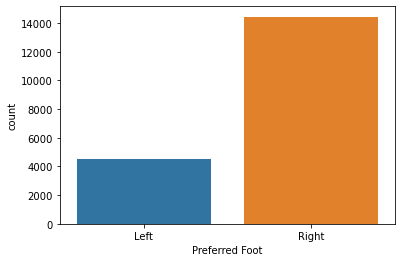

In [54]:
sns.countplot(data=fifa,x='Preferred Foot')

In [55]:
fifa['BOV'].max()

93

In [56]:
fifa['BOV'].min()

48

In [57]:
fifa['Best Position'].value_counts()

CB     3686
ST     2680
CAM    2299
GK     2075
RM     1611
CDM    1445
LB     1086
RB     1079
CM     1047
LM      871
RW      298
RWB     277
LWB     261
LW      186
CF       78
Name: Best Position, dtype: int64

In [58]:
fifa['Best Position'] = fifa['Best Position'].astype('category')

<AxesSubplot:xlabel='count', ylabel='Best Position'>

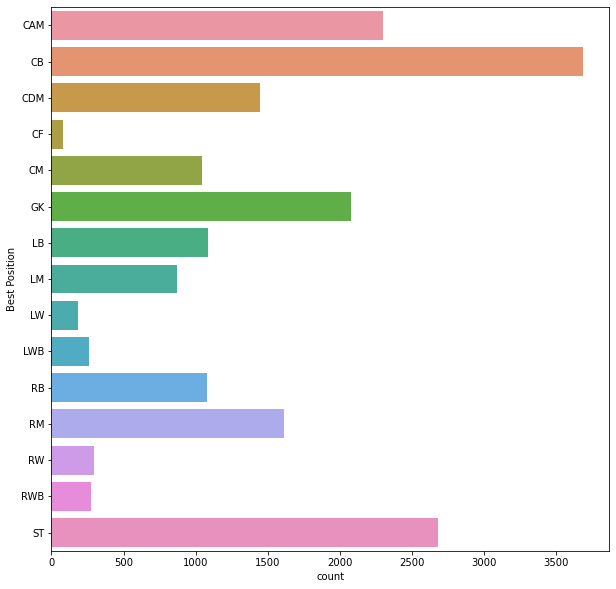

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(data=fifa, y='Best Position', orient='h')

In [60]:
fifa['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [61]:
fifa.columns

Index(['ID', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age', 'OVA',
       'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'H

In [62]:
fifa['Value']

0        €103.5M
1           €63M
2          €120M
3          €129M
4          €132M
          ...   
18974      €100K
18975      €130K
18976      €120K
18977      €100K
18978      €100K
Name: Value, Length: 18979, dtype: object

In [63]:
#changing the players' value to euros(float)
def to_euros(x):
    x['Value']= x['Value'][1:]
    if x['Value'].endswith('K'):
        return float(x['Value'].strip('K'))*1000
    else:
        return float(x['Value'].strip('M'))*1_000_000

In [64]:
fifa['Value'] =fifa.apply(to_euros, axis=1)

In [65]:
fifa['Wage']

0        €560K
1        €220K
2        €125K
3        €370K
4        €270K
         ...  
18974      €1K
18975     €500
18976     €500
18977      €2K
18978      €1K
Name: Wage, Length: 18979, dtype: object

In [66]:
#wages to float
def wages_euros(x):
    x['Wage']= x['Wage'][1:]
    if x['Wage'].endswith('K'):
        return float(x['Wage'].strip('K'))*1_000
    else:
        return float(x['Wage'].strip('M'))*1_000_000

In [67]:
fifa['Wage']= fifa.apply(wages_euros, axis= 1)

In [68]:
fifa['Wage'].dtype

dtype('float64')

In [69]:
fifa['Release Clause'].head()

0    €138.4M
1     €75.9M
2    €159.4M
3      €161M
4    €166.5M
Name: Release Clause, dtype: object

In [70]:
#release clause to euros
def release_euros(x):
    x['Release Clause']= x['Release Clause'][1:]
    if x['Release Clause'].endswith('K'):
        return float(x['Release Clause'].strip('K'))*1_000
    else:
        return float(x['Release Clause'].strip('M'))*1_000_000

In [71]:
fifa['Release Clause'] = fifa.apply(release_euros, axis=1)

In [72]:
fifa[['Value', 'Wage','Release Clause']]

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0
...,...,...,...
18974,100000.0,1000.0,70000.0
18975,130000.0,500000000.0,165000.0
18976,120000.0,500000000.0,131000.0
18977,100000.0,2000.0,88000.0


In [73]:
fifa.columns

Index(['ID', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age', 'OVA',
       'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'H

In [74]:
#checking the stats of some attributes
fifa.describe().loc[:,'Attacking':'Base Stats']

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,...,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,...,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197
std,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,...,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117
min,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,...,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000
25%,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,...,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000
50%,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,...,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000
75%,297.000000,63.000000,62.000000,64.000000,68.000000,56.000000,310.000000,68.000000,61.000000,55.000000,...,65.000000,63.000000,59.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1781.000000,384.000000
max,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,470.000000,96.000000,94.000000,94.000000,...,93.000000,90.000000,440.000000,90.000000,92.000000,93.000000,91.000000,90.000000,2316.000000,498.000000


In [75]:
fifa[[ 'W/F', 'SM', 'A/W', 'D/W', 'IR']]

,W/F,SM,A/W,D/W,IR
0,4 ★,4★,Medium,Low,5 ★
1,4 ★,5★,High,Low,5 ★
2,3 ★,1★,Medium,Medium,3 ★
3,5 ★,4★,High,High,4 ★
4,5 ★,5★,High,Medium,5 ★
...,...,...,...,...,...
18974,2 ★,2★,Medium,Medium,1 ★
18975,2 ★,2★,Medium,Medium,1 ★
18976,2 ★,2★,Medium,Medium,1 ★
18977,3 ★,2★,Medium,Medium,1 ★


In [76]:
fifa['W/F']= fifa['W/F'].str.strip('★')

In [77]:
fifa['SM']= fifa['SM'].str.strip('★')

In [78]:
fifa['IR'] = fifa['IR'].str.strip('★')

In [79]:
fifa['A/W']= fifa['A/W'].astype('category')

In [80]:
fifa['D/W']= fifa['D/W'].astype('category')

In [81]:
fifa[[ 'W/F', 'SM', 'A/W', 'D/W', 'IR']]

,W/F,SM,A/W,D/W,IR
0,4,4,Medium,Low,5
1,4,5,High,Low,5
2,3,1,Medium,Medium,3
3,5,4,High,High,4
4,5,5,High,Medium,5
...,...,...,...,...,...
18974,2,2,Medium,Medium,1
18975,2,2,Medium,Medium,1
18976,2,2,Medium,Medium,1
18977,3,2,Medium,Medium,1


In [82]:
fifa.head()

,ID,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,...,High,Low,5,89,93,81,89,35,77,562
2,200389,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,...,High,Medium,5,91,85,86,94,36,59,595


In [83]:
#trying to check for anomalies in any of this set of columns through their stats, instead of going through them one by one
fifa[['PAC', 'SHO', 'PAS','DRI', 'DEF', 'PHY']].describe()

,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


Final chaeck through the dataset

In [84]:
fifa.head()

,ID,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,...,High,Low,5,89,93,81,89,35,77,562
2,200389,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,...,High,Medium,5,91,85,86,94,36,59,595


In [85]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                18979 non-null  int64   
 1   LongName          18979 non-null  object  
 2   photoUrl          18979 non-null  object  
 3   playerUrl         18979 non-null  object  
 4   Nationality       18979 non-null  object  
 5   Age               18979 non-null  int64   
 6   OVA               18979 non-null  int64   
 7   POT               18979 non-null  int64   
 8   Club              18979 non-null  object  
 9   Contract          18979 non-null  object  
 10  Positions         18979 non-null  object  
 11  Height            18979 non-null  float64 
 12  Weight            18979 non-null  float64 
 13  Preferred Foot    18979 non-null  category
 14  BOV               18979 non-null  int64   
 15  Best Position     18979 non-null  category
 16  Joined            1897

# We're done